In [1]:
import os
from PIL import Image

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        try:
            with Image.open(file_path) as img:
                images.append(img.copy())  # Copy ensures the file can be closed
        except Exception as e:
            print(f"Error loading image {file_path}: {e}")
    return images

# Example usage
folder_path = "./images/"
images = load_images_from_folder(folder_path)
print(f"Loaded {len(images)} images.")

Error loading image ./images/.DS_Store: cannot identify image file './images/.DS_Store'
Loaded 6 images.


In [2]:
import matplotlib.pyplot as plt

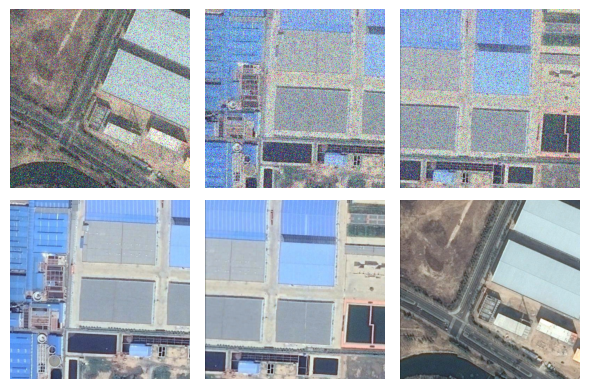

In [43]:
def plot_images(images, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(6, 4))  # Adjust figure size as needed
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    for i, ax in enumerate(axes):
        if i < len(images):
            ax.imshow(images[i])
            ax.axis('off')  # Turn off the axis
        else:
            ax.axis('off')  # Turn off unused axes
    
    plt.tight_layout()
    plt.show()

plot_images(images)

In [4]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import models, transforms
from PIL import Image
from sklearn.metrics.pairwise import cosine_similarity



In [5]:
# Load a pretrained model (ResNet18) and remove the classification layer
model = models.resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])  # Remove the final classification layer
model.eval()

# Preprocessing for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

# Function to extract embeddings
def extract_embedding(image, model):
    image = transform(image).unsqueeze(0)  # Add batch dimension
    with torch.no_grad():
        embedding = model(image).squeeze().numpy()  # Remove batch and flatten
    return embedding


/Users/kash/.local/share/virtualenvs/AIL862-I6XuGHb-/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/kash/.local/share/virtualenvs/AIL862-I6XuGHb-/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


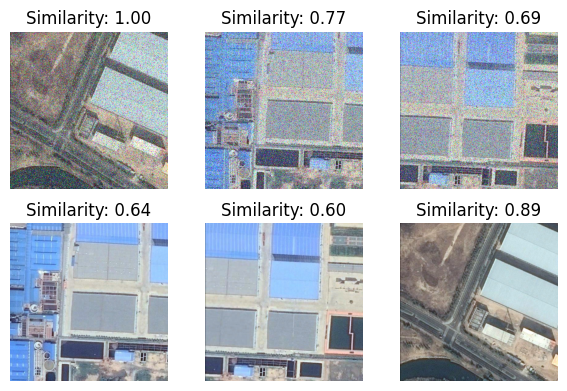

In [59]:


# Visualize images with similarity scores
def plot_images_with_similarity(images, similarities, rows=2, cols=3):
    fig, axes = plt.subplots(rows, cols, figsize=(6, 4))
    axes = axes.flatten()
    for i, ax in enumerate(axes):
        if i < len(images):
            ax.imshow(images[i])
            ax.axis('off')
            ax.set_title(f"Similarity: {similarities[i]:.2f}")
        else:
            ax.axis('off')
    plt.tight_layout()
    plt.show()


# Compute embeddings for each image
embeddings = [extract_embedding(img, model) for img in images]

# Compute similarity to the first image (example)
reference_embedding = embeddings[0]
similarities = [cosine_similarity([reference_embedding], [embedding])[0][0] for embedding in embeddings]

# Visualize images with similarity scores
plot_images_with_similarity(images, similarities)

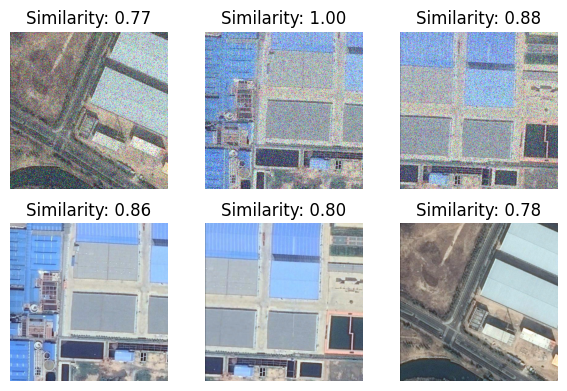

In [60]:
embeddings = [extract_embedding(img, model) for img in images]

# Compute similarity to the first image (example)
reference_embedding = embeddings[1]
similarities = [cosine_similarity([reference_embedding], [embedding])[0][0] for embedding in embeddings]

# Visualize images with similarity scores
plot_images_with_similarity(images, similarities)

In [70]:
import cv2
import matplotlib.pyplot as plt
softened_images = []
for image in images:
    image_np = np.array(image)
    image_np = cv2.medianBlur(image_np, 5)  # Kernel size (15)
    softened_images.append(Image.fromarray(image_np))

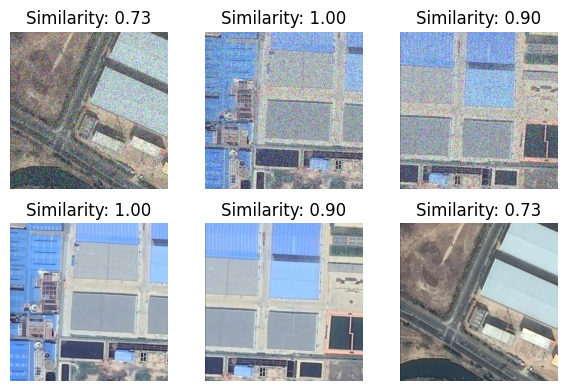

In [71]:
from sklearn.metrics.pairwise import euclidean_distances,manhattan_distances

embeddings = [extract_embedding(img, model) for img in softened_images]

# Compute similarity to the first image (example)
reference_embedding = embeddings[1]
similarities = [cosine_similarity([reference_embedding], [embedding])[0][0] for embedding in embeddings]

# Visualize images with similarity scores
plot_images_with_similarity(images, similarities)

In [77]:
pairs = [(0,1),(0,3),(1,2),(0,4),(0,5)]
print("="*8+" Results "+"="*8)
for first,second in pairs:
    print(f"Similarity between image {first+1} and image {second+1}:",cosine_similarity([embeddings[first]],[embeddings[second]])[0][0])
print("="*25)


======== Results ========
Similarity between image 1 and image 2: 0.7273083
Similarity between image 1 and image 4: 0.7289478
Similarity between image 2 and image 3: 0.8995426
Similarity between image 1 and image 5: 0.6700382
Similarity between image 1 and image 6: 0.9988342


512